In [102]:
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import print_summary
import matplotlib.pyplot as plt
import numpy as np

In [4]:
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (256, 256, 3))

In [5]:
checkpoint = ModelCheckpoint("vgg16_custom.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [6]:
for layer in model.layers[:]:
    layer.trainable=False

In [7]:
x = model.output
x = Flatten()(x)
x = Dense(100, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation="softmax")(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model_final = Model(input = model.input, output = predictions)
model_final.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [9]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [4]:
test_count = 190
train_count = 1000
batch_size = 16

In [5]:
datagen = ImageDataGenerator()
train = datagen.flow_from_directory('data/train/', class_mode='categorical', batch_size=batch_size)
test = datagen.flow_from_directory('data/test/', class_mode='categorical', batch_size=batch_size)

Found 1000 images belonging to 2 classes.
Found 190 images belonging to 2 classes.


In [12]:
model_final.fit_generator(train, steps_per_epoch=train_count/batch_size, validation_data=test, validation_steps=test_count/batch_size, epochs=100, callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
63/62 [==============================] - 10s 162ms/step - loss: 4.9527 - acc: 0.6548 - val_loss: 3.5553 - val_acc: 0.7632

Epoch 00001: val_acc improved from -inf to 0.76316, saving model to vgg16_custom.h5
Epoch 2/100
63/62 [==============================] - 5s 84ms/step - loss: 4.6683 - acc: 0.6845 - val_loss: 5.6840 - val_acc: 0.6368

Epoch 00002: val_acc did not improve from 0.76316
Epoch 3/100
63/62 [==============================] - 5s 84ms/step - loss: 4.6653 - acc: 0.6935 - val_loss: 4.8705 - val_acc: 0.6474

Epoch 00003: val_acc did not improve from 0.76316
Epoch 4/100
63/62 [==============================] - 5s 84ms/step - loss: 3.9570 - acc: 0.7341 - val_loss: 2.4786 - val_acc: 0.8105

Epoch 00004: val_acc improved from 0.76316 to 0.81053, saving model to vgg16_custom.h5
Epoch 5/100
63/62 [==============================] - 5s 84ms/step - loss: 3.4623 - acc: 0.7629 - val_loss: 4.3118 - val_acc: 0.7211

Epoch 00005: v

In [6]:
model_trained = load_model('vgg16_custom.h5')
results = model_trained.evaluate_generator(test, steps=test_count/batch_size)

In [7]:
print('Test loss: ' + str(results[0]))
print('Accuracy: ' + str(results[1]))

Test loss: 1.042738244172774
Accuracy: 0.8894736823282744


In [103]:
from keras.preprocessing import image
img1 = image.load_img("data/test/other/0010.png", target_size=(256, 256, 3))
img2 = image.load_img("data/test/tiger/0019.png", target_size=(256, 256, 3))

In [104]:
img1 = np.array(img1).reshape((1, 256, 256, 3))
img2 = np.array(img2).reshape((1, 256, 256, 3))
output1 = model_trained.predict(img1).argmax()
output2 = model_trained.predict(img2).argmax()

In [105]:
def predict_label(output):
    if(output == 1):
        print("Predicted result is a tiger")
    else:
        print("Cannot detect tiger in the image")

Cannot detect tiger in the image
None


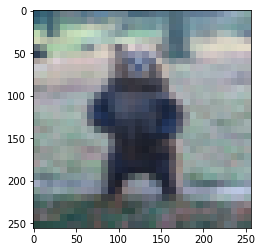

In [106]:
plt.imshow(img1.reshape((256, 256, 3)))
print(predict_label(output1))

Predicted result is a tiger
None


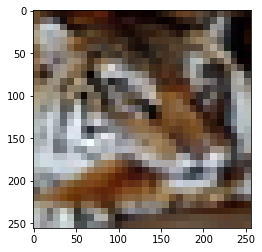

In [107]:
plt.imshow(img2.reshape((256, 256, 3)))
print(predict_label(output2))